In [124]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp
from scipy.optimize import curve_fit
from scipy import stats

##### The below code is just so that my plots would all load at the same time, no need to look into it. 

In [125]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Note - Python uses the equation $ \sigma_f^2 = \sigma_x^2 \Big( \frac{\partial f}{\partial x} \Big) + \sigma_y^2 \Big( \frac{\partial f}{\partial y} \Big) + \sigma_z^2 \Big( \frac{\partial f}{\partial z} \Big) + ...$ in the uncertainties package to propagate the uncertainty 

# Pulsed-NMR Experiment 1

## Calculating T1 values

In [126]:
#values will be set up by sample
sample = ["Mineral oil", "Vaseline", "Glycerin", "Water", "Ethanol"]

zero_crossing = [26.7 * 10**-3, 27.5 * 10**-3, 92.5 * 10**-3, 1.38, 1.05] #(sec)
zero_crossing_uncertainty = [1.3 * 10**-3, 1.5 * 10**-3, 7.5 * 10**-3, 0.08, 0.05] #(sec)
zero_cross_with_uncertainty = []
for i in range(len(zero_crossing)):
    x = ufloat(zero_crossing[i], zero_crossing_uncertainty[i])
    zero_cross_with_uncertainty.append(x)

T_1 = []
T_1_uncertainty = []
for i in range(len(zero_crossing)):
    T_1.append(np.round(zero_crossing[i] / log(2), 4))
    T_1_uncertainty.append(np.round(unp.std_devs(zero_cross_with_uncertainty[i]) / log(2), 3))
    print("T_1 for " + str(sample[i]) + " = " +str(T_1[i])+ "+/-" +str(T_1_uncertainty[i]) + " sec.")

T_1 for Mineral oil = 0.0385+/-0.002 sec.
T_1 for Vaseline = 0.0397+/-0.002 sec.
T_1 for Glycerin = 0.1334+/-0.011 sec.
T_1 for Water = 1.9909+/-0.115 sec.
T_1 for Ethanol = 1.5148+/-0.072 sec.


## Calculating T2 Values

D:\Anaconda\New folder\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in exp


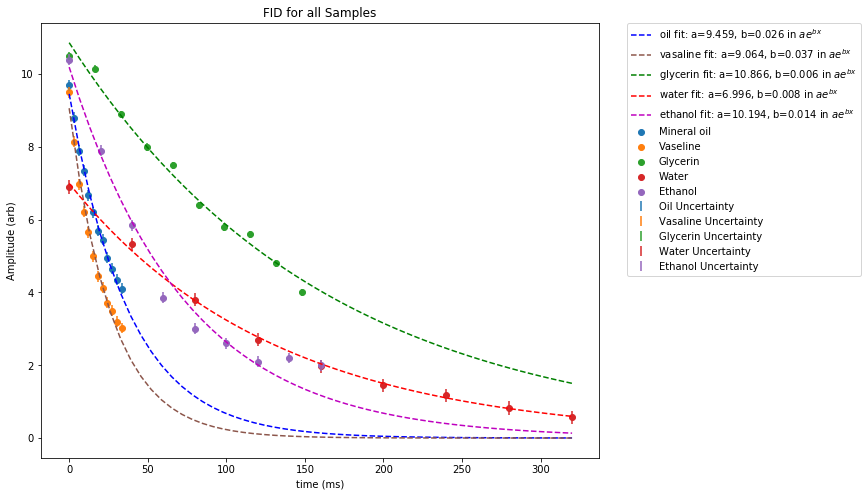

The results give T2 as:
37.802+/-0.15ms for Mineral Oil 
27.243+/-0.15ms for Vasaline
161.759+/-0.1ms for Glycerin
129.89+/-0.18ms for Water
73.929+/-0.15ms for Ethanol



In [149]:
#function used to narmalize data so they may be compared
def normalizer(x):
    normalized_data = []
    for i in range(len(x)):    
        newx = (x[i]-min(x))/(max(x)-min(x))
        normalized_data.append(newx)
    return normalized_data

#all time in (ms) all y vals are in (arb)

oil_time = [0, 3.04, 6.08, 9.12, 12.16, 15.2, 18.24, 21.28, 24.32, 27.36, 30.4, 33.44]
oil_y_vals = [9.7, 8.8, 7.9, 7.35, 6.675, 6.2, 5.7, 5.45, 4.95, 4.65, 4.35, 4.1]
oil_uncertainty = 0.15

    
vasaline_time = [0, 3.04, 6.08, 9.12, 12.16, 15.2, 18.24, 21.28, 24.32, 27.36, 30.4, 33.44]
vasaline_y_vals = [9.5, 8.15, 6.975, 6.215, 5.65, 5, 4.45, 4.125, 3.725, 3.5, 3.2, 3.025]
vasaline_uncertainty = 0.15 


glycerin_time = [0, 16.47, 32.94, 49.41, 65.88, 82.35, 98.82, 115.29, 131.76, 148.23]
glycerin_y_vals = [10.5, 10.15, 8.9, 8, 7.5, 6.4, 5.8, 5.6, 4.8, 4]
glycerin_uncertainty = 0.10


water_time  = [0, 40, 80, 120, 160, 200, 240, 280, 320]
water_y_vals = [6.9, 5.325, 3.8, 2.7, 1.975, 1.45, 1.175, 0.825, 0.575]
water_uncertainty = 0.18


ethanol_time = [0, 20, 40, 60, 80, 100, 120, 140, 160]
ethanol_y_vals = [10.4, 7.9, 5.85, 3.85, 3, 2.6, 2.1, 2.2, 2]
ethanol_uncertainty = 0.15


#all_normed_t = [normalizer(oil_time), normalizer(vasaline_time), normalizer(glycerin_time), normalizer(water_time),
#                normalizer(ethanol_time)]
#all_normed_y = [normalizer(oil_y_vals), normalizer(vasaline_y_vals), normalizer(glycerin_y_vals),
#                normalizer(water_y_vals), normalizer(ethanol_y_vals)]

#oil_norm_unc = []
#for i in range(len(water_time)):
#    oil_norm_unc.append(oil_uncertainty / (oil_y_vals[i]*oil_y_vals[0]))
    


#exponential function for fitting
def func(x, a, b):
    exp_vals = []
    for i in range(len(x)):
        exp_vals.append(a * np.exp(-b * x[i]))
    return  exp_vals

x_space = np.linspace(0, water_time[-1], 50)
plt.figure(figsize = (10,8))
    
#plt.scatter(oil_time, all_normed_y[0], label = sample[0])
#plt.scatter(vasaline_time, all_normed_y[1], label = sample[1])
#plt.scatter(glycerin_time, all_normed_y[2], label = sample[2])
#plt.scatter(water_time, all_normed_y[3], label = sample[3])
#plt.scatter(ethanol_time, all_normed_y[4], label = sample[4])

plt.scatter(oil_time, oil_y_vals, label = sample[0])
plt.scatter(vasaline_time, vasaline_y_vals, label = sample[1])
plt.scatter(glycerin_time, glycerin_y_vals, label = sample[2])
plt.scatter(water_time, water_y_vals, label = sample[3])
plt.scatter(ethanol_time, ethanol_y_vals, label = sample[4])

plt.errorbar(oil_time, oil_y_vals, yerr= oil_uncertainty, marker = 'None', fmt = 'o', label = 'Oil Uncertainty')
plt.errorbar(vasaline_time, vasaline_y_vals, yerr= vasaline_uncertainty, marker = 'None', fmt = 'o', label = 'Vasaline Uncertainty')
plt.errorbar(glycerin_time, glycerin_y_vals, yerr= glycerin_uncertainty, marker = 'None', fmt = 'o', label = 'Glycerin Uncertainty')
plt.errorbar(water_time, water_y_vals, yerr= water_uncertainty, marker = 'None', fmt = 'o', label = 'Water Uncertainty')
plt.errorbar(ethanol_time, ethanol_y_vals, yerr= ethanol_uncertainty, marker = 'None', fmt = 'o', label = 'Ethanol Uncertainty')
    
popt0, pcov0 = curve_fit(func, oil_time,  oil_y_vals)
plt.plot(x_space, func(x_space, *popt0), "b--", label='oil fit: a=%5.3f, b=%5.3f in $ae^{bx}$' % tuple(popt0))
popt1, pcov1 = curve_fit(func, vasaline_time,  vasaline_y_vals)
plt.plot(x_space, func(x_space, *popt1), "--", label='vasaline fit: a=%5.3f, b=%5.3f in $ae^{bx}$' % tuple(popt1))
popt2, pcov2 = curve_fit(func, glycerin_time,  glycerin_y_vals)
plt.plot(x_space, func(x_space, *popt2), "g--", label='glycerin fit: a=%5.3f, b=%5.3f in $ae^{bx}$' % tuple(popt2))
popt3, pcov3 = curve_fit(func, water_time,  water_y_vals, p0 = [1, .0001])
plt.plot(x_space, func(x_space, *popt3), "r--", label='water fit: a=%5.3f, b=%5.3f in $ae^{bx}$' % tuple(popt3))
popt4, pcov4 = curve_fit(func, ethanol_time,  ethanol_y_vals, p0 = [1, .02])
plt.plot(x_space, func(x_space, *popt4), "m--", label='ethanol fit: a=%5.3f, b=%5.3f in $ae^{bx}$' % tuple(popt4))

plt.xlabel('time (ms)')
plt.ylabel('Amplitude (arb)')
plt.title( "FID for all Samples")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print("The results give T2 as:\n" + str(np.round(1/popt0[1], 3)) + "+/-" + str(oil_uncertainty) + "ms for Mineral Oil \n" +
      str(np.round(1/popt1[1], 3)) + "+/-" + str(vasaline_uncertainty) + "ms for Vasaline\n" +
      str(np.round(1/popt2[1], 3)) + "+/-" + str(glycerin_uncertainty) + "ms for Glycerin\n" +
      str(np.round(1/popt3[1], 3)) + "+/-" + str(water_uncertainty) + "ms for Water\n" +
      str(np.round(1/popt4[1], 3)) + "+/-" + str(ethanol_uncertainty) + "ms for Ethanol\n")

# Experiment 3

## Calculating T1 Values

In [130]:
solution_name = ["1/4 mixture", "1/16 mixture", "1/64 mixture", "1/256 mixture", "1/1024 mixture", ]

#zero crossing
zc = [2, 11.8, 27, 79, 225]
zc_uncertainty = [0.04, 0.4, 0.5, 3, 5]
zc_with_uncertainty = []
for i in range(len(zc)):
    x = ufloat(zc[i], zc_uncertainty[i])
    zc_with_uncertainty.append(x)

T1 = []
T1_uncertainty = []
for i in range(len(zc)):
    T1.append(np.round(zc[i] / log(2), 3))
    T1_uncertainty.append(np.round(unp.std_devs(zc_with_uncertainty[i]) / log(2), 3))
    print("T1 for " + str(solution_name[i]) + " = " +str(T1[i])+ "+/-" +str(T1_uncertainty[i]) + " ms.")


T1 for 1/4 mixture = 2.885+/-0.058 ms.
T1 for 1/16 mixture = 17.024+/-0.577 ms.
T1 for 1/64 mixture = 38.953+/-0.721 ms.
T1 for 1/256 mixture = 113.973+/-4.328 ms.
T1 for 1/1024 mixture = 324.606+/-7.213 ms.


## Calculating T2 Values

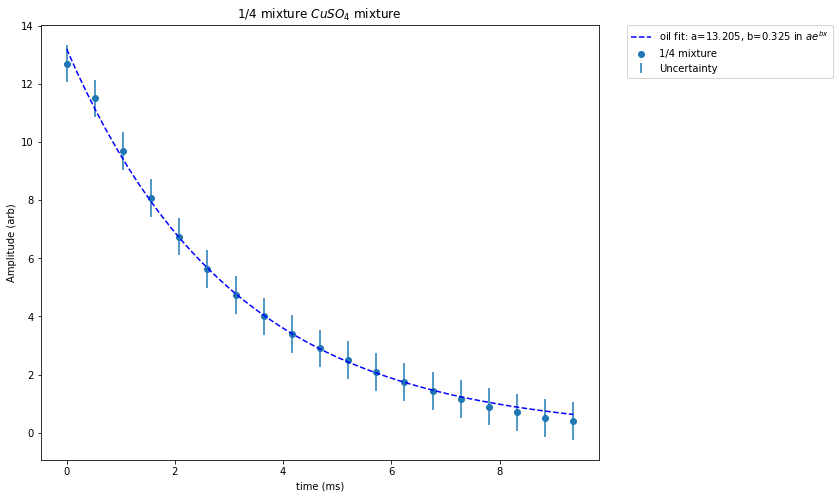

D:\Anaconda\New folder\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: overflow encountered in exp


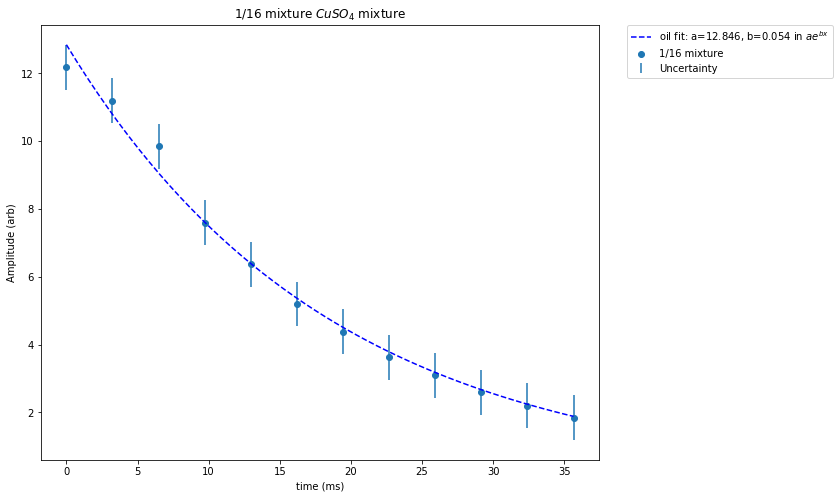

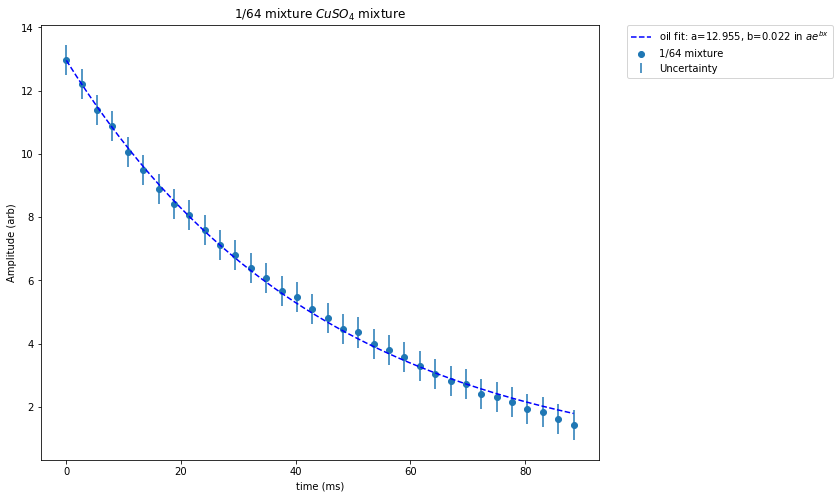

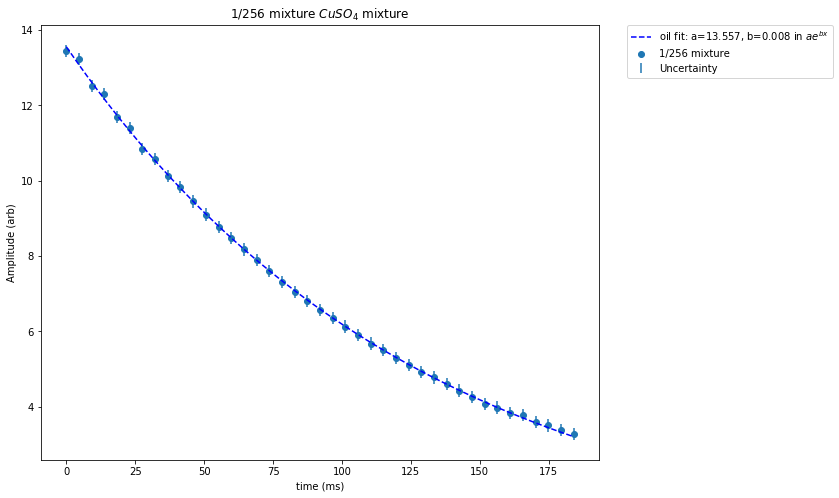

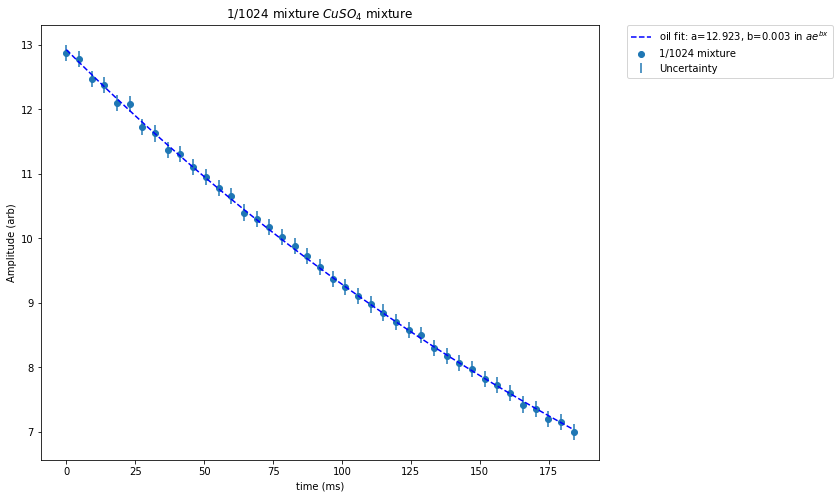

For 1/4 mixture, T2=3.076+/-0.65 ms
For 1/16 mixture, T2=18.57+/-0.6625 ms
For 1/64 mixture, T2=44.682+/-0.475 ms
For 1/256 mixture, T2=127.522+/-0.1625 ms
For 1/1024 mixture, T2=302.747+/-0.125 ms


In [147]:
#one4th is 1/4 solution, one16th is 1/16 solution and so on...

solution_name = ["1/4 mixture", "1/16 mixture", "1/64 mixture", "1/256 mixture", "1/1024 mixture", ]

one4th_t = [0, 0.52, 1.04, 1.56, 2.08, 2.6, 3.12, 3.64, 4.16, 4.68, 5.2, 5.72, 6.24, 6.76, 7.28, 7.8, 8.32, 8.84, 9.36]
one4th_y = [12.7, 11.5, 9.7, 8.075, 6.75, 5.625, 4.75, 4, 3.4, 2.9, 2.5, 2.1, 1.75, 1.425, 1.175, 0.9, 0.7, 0.5, 0.4]

one16th_t = [0, 3.24, 6.48, 9.72, 12.96, 16.2, 19.44, 22.68, 25.92, 29.16, 32.4, 35.64]
one16th_y = [12.175, 11.2, 9.85, 7.6, 6.375, 5.2, 4.375, 3.625, 3.1, 2.6, 2.2, 1.85]

one64th_t = [0, 2.68, 5.36, 8.04, 10.72, 13.4, 16.08, 18.76, 21.44, 24.12, 26.8, 29.48, 32.16, 34.84, 37.52, 40.2, 42.88, 
             45.56, 48.24, 50.92, 53.6, 56.28, 58.96, 61.64, 64.32, 67, 69.68, 72.36, 75.04, 77.72, 80.4, 83.08, 85.76, 88.44]
one64th_y = [12.975, 12.2, 11.4, 10.875, 10.05, 9.5, 8.9, 8.425, 8.05, 7.6, 7.125, 6.8, 6.375, 6.075, 5.675, 5.475, 5.1,
             4.8, 4.45, 4.35, 4, 3.8, 3.575, 3.3, 3.05, 2.825, 2.725, 2.4, 2.3, 2.15, 1.925, 1.85, 1.6, 1.425]

one256th_t = [0, 4.6, 9.2, 13.8, 18.4, 23, 27.6, 32.2, 36.8, 41.4, 46, 50.6, 55.2, 59.8, 64.4, 69, 73.6, 78.2, 82.8, 87.4,
              92, 96.6, 101.2, 105.8, 110.4, 115, 119.6, 124.2, 128.8, 133.4, 138, 142.6, 147.2, 151.8, 156.4, 161, 165.6,
              170.2, 174.8, 179.4, 184]
one256th_y = [13.45, 13.225, 12.525, 12.3, 11.7, 11.4, 10.85, 10.575, 10.125, 9.825, 9.45, 9.1, 8.775, 8.475, 8.175, 7.9,
              7.6, 7.3, 7.05, 6.8, 6.575, 6.35, 6.125, 5.9, 5.675, 5.5, 5.3, 5.1, 4.925, 4.775, 4.6, 4.425, 4.25, 4.075,
              3.975, 3.825, 3.775, 3.6, 3.5, 3.375, 3.275]

one1024th_t = [0, 4.6, 9.2, 13.8, 18.4, 23, 27.6, 32.2, 36.8, 41.4, 46, 50.6, 55.2, 59.8, 64.4, 69, 73.6, 78.2, 82.8, 87.4,
               92, 96.6, 101.2, 105.8, 110.4, 115, 119.6, 124.2, 128.8, 133.4, 138, 142.6, 147.2, 151.8, 156.4, 161, 165.6,
               170.2, 174.8, 179.4, 184]
one1024th_y = [12.875, 12.775, 12.475, 12.375, 12.1, 12.075, 11.725, 11.625, 11.375, 11.3, 11.1, 10.95, 10.775, 10.65, 10.4,
               10.3, 10.175, 10.025, 9.875, 9.725, 9.55, 9.375, 9.25, 9.1, 8.975, 8.85, 8.7, 8.575, 8.5, 8.3, 8.175, 8.075,
               7.975, 7.825, 7.725, 7.6, 7.425, 7.35, 7.2, 7.15, 7]

t_vals = [one4th_t, one16th_t, one64th_t, one256th_t, one1024th_t]
y_vals = [one4th_y, one16th_y, one64th_y, one256th_y, one1024th_y]
uncertainty = [(1.2+.1)/2, (.975+.35)/2, (.775+.175)/2, (.225+.1)/2, (.1+.15)/2] #the average of the difference of 
                                                                                #the first two values and last two values

b_vals = []
for i in range(len(t_vals)):
    x_space = np.linspace(0, t_vals[i][-1], 50)
    plt.figure(figsize = (10,8))
    plt.scatter(t_vals[i], y_vals[i], label =solution_name[i])

    plt.errorbar(t_vals[i], y_vals[i], yerr= uncertainty[i], marker = 'None', fmt = 'o', label = 'Uncertainty')

    popt, pcov = curve_fit(func, t_vals[i],  y_vals[i])
    b_vals.append(popt[1])
    plt.plot(x_space, func(x_space, *popt), "b--", label='oil fit: a=%5.3f, b=%5.3f in $ae^{bx}$' % tuple(popt))
    
    plt.xlabel('time (ms)')
    plt.ylabel('Amplitude (arb)')
    plt.title( str(solution_name[i]) + ' $ CuSO_4$ mixture ' )
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
for i in range(len(t_vals)):
    print("For " + str(solution_name[i])+ ", T2="  + str(np.round(1/b_vals[i], 3)) + "+/-" + str(uncertainty[i]) + " ms")